# Task 1. Use case scenario and dataset description

In [25]:
import pandas as pd

df = pd.read_csv("drug200.csv") # Load data

# Task 2. Basic data processing

## 2.a) See how many of each class is in the given dataset using visualisation techniques

In [17]:
print("\n", df_sex := df.value_counts(["Sex"]))
print("\n", df_bp := df.value_counts(["BP"]))
print("\n", df_cholesterol := df.value_counts(["Cholesterol"]))
print("\n", df_drug := df.value_counts(["Drug"]))


 Sex
M      104
F       96
dtype: int64

 BP    
HIGH      77
LOW       64
NORMAL    59
dtype: int64

 Cholesterol
HIGH           103
NORMAL          97
dtype: int64

 Drug 
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
dtype: int64


<AxesSubplot:title={'center':'Sex'}, xlabel='Sex'>

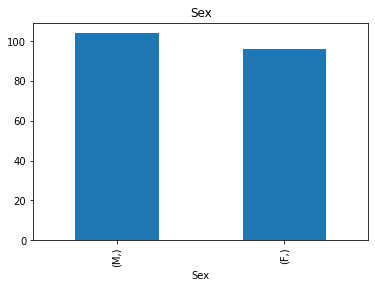

In [18]:
df_sex.plot(kind="bar", title="Sex")

<AxesSubplot:title={'center':'BP'}, xlabel='BP'>

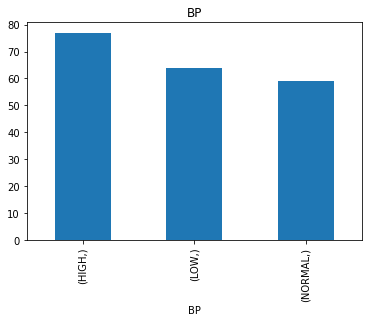

In [19]:
df_bp.plot(kind="bar", title="BP")

<AxesSubplot:title={'center':'Cholesterol'}, xlabel='Cholesterol'>

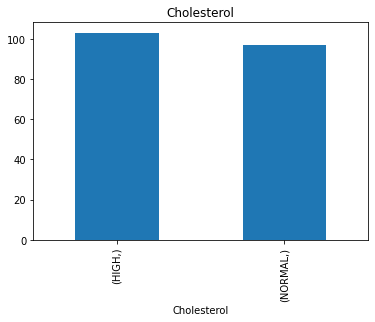

In [20]:
df_cholesterol.plot(kind="bar", title="Cholesterol")

<AxesSubplot:title={'center':'Drug'}, xlabel='Drug'>

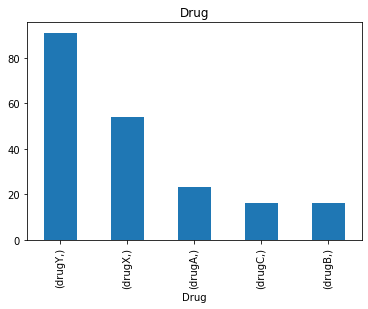

In [21]:
df_drug.plot(kind="bar", title="Drug")

## 2.b) Define feature set

In [77]:
from sklearn.preprocessing import OneHotEncoder #Import encoder
from numpy import asarray
import numpy as np

def transform_categorical(input_df: object, category: str, series: bool):
    """Transform categorical feature to multiple colunmns of 1s and 0s

    Args:
        input_df (object): dataframe containing feature(s)
        category (str): the name of the feature you want to transform
        series (bool): if input is a series or not

    Returns:
        object: returns dataframe instance with transformed feature
    """
    if series == False: # For dataframe
        data = asarray(input_df[category])   # Make dataframe to np.array because series has no reshape method
        data = data.reshape(-1, 1)           # Reshape because there is only one feature

        ohe = OneHotEncoder(categories="auto", sparse=False, dtype=np.int)    # Initialize encoder
        ohe.fit(data) # Fit on data

        transformed = ohe.transform(input_df[category].to_numpy().reshape(-1, 1))    # Transform categories to numbers with fitted encoder
        print(f"Found [{len(ohe.categories_[0])}] categories in column [{category}]: {ohe.categories_[0]}") # Print info
        categories = [category + "_" + i for i in ohe.categories_[0]]                # Rename categories

        transformed = pd.DataFrame(transformed, columns=categories)                     # Create new dateframe with transformed features 
        input_df = pd.concat([input_df, transformed], axis=1).drop([category], axis=1)  # Concatanate both dataframes

        return input_df

    elif series == True: # For series
        data = asarray(input_df).reshape(-1, 1)

        ohe = OneHotEncoder(categories="auto", sparse=False, dtype=np.int)
        ohe.fit(data)

        # transformed = ohe.transform(input_df.to_numpy().reshape(-1, 1))
        transformed = ohe.transform(data)
        print(f"Found [{len(ohe.categories_[0])}] categories in column [{category}]: {ohe.categories_[0]}")
        categories = [category + "_" + i for i in ohe.categories_[0]]

        transformed = pd.DataFrame(transformed, columns=categories)
        input_df = pd.concat([input_df, transformed], axis=1).drop([category], axis=1)

        return input_df
    

In [78]:
df = pd.read_csv("drug200.csv") # Load data

categorical = df[["Sex", "BP", "Cholesterol"]]                         # Define categorical features
categorical = transform_categorical(categorical, "Sex", False)         # Transform column
categorical = transform_categorical(categorical, "BP", False)          # Transform column
categorical = transform_categorical(categorical, "Cholesterol", False) # Transform column
# categorical.head()

features = df[["Age", "Na_to_K"]]                       # Define non categorical features
features = pd.concat((features, categorical), axis=1)   # Concatenate dataframes
feature_names = features.columns                        # Make a copy of the column names for later

target = df["Drug"]
target = transform_categorical(target, "Drug", True)  # Define the target variable

Found [2] categories in column [Sex]: ['F' 'M']
Found [3] categories in column [BP]: ['HIGH' 'LOW' 'NORMAL']
Found [2] categories in column [Cholesterol]: ['HIGH' 'NORMAL']
Found [5] categories in column [Drug]: ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


## 2.c) Perform z-score standardization

In [79]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()               # Init scaler
ss.fit(features, target)            # Fit scaler on data
features = ss.transform(features)   # Transform all features

features = pd.DataFrame(data=features, columns=feature_names) # Make DataFrame from numpy array
features.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-1.291591,1.286522,1.040833,-1.040833,1.263884,-0.685994,-0.646869,0.970437,-0.970437
1,0.162699,-0.415145,-0.960769,0.960769,-0.791212,1.457738,-0.646869,0.970437,-0.970437
2,0.162699,-0.828558,-0.960769,0.960769,-0.791212,1.457738,-0.646869,0.970437,-0.970437
3,-0.988614,-1.149963,1.040833,-1.040833,-0.791212,-0.685994,1.545908,0.970437,-0.970437
4,1.011034,0.271794,1.040833,-1.040833,-0.791212,1.457738,-0.646869,0.970437,-0.970437


## 2.d) Using skikit-learn perform train-test split

In [80]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(features, target, train_size=0.8)

# Task 3. Kick start KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN(n_neighbors=3)     # Model init
classifier.fit(X_train, y_train)    # Fit on train data
y_pred = classifier.predict(X_test) # Predict on testing data

In [110]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, jaccard_score
import numpy as np

def calculate_scores(y_real, y_pred):

    def mean_absolute_percentage_error(actual, pred):
        actual, pred = np.array(actual), np.array(pred)
        return np.mean(np.abs((actual - pred) / actual)) * 100

    print("Accuracy score:", accuracy_score(y_real, y_pred))
    print(f"Mean absolute error: {mean_absolute_error(y_real, y_pred)}")
    # print(f"Residual sum of squares: {np.linalg.lstsq(y_test, y_pred)}")
    print(f"R2 score: {r2_score(y_real, y_pred)}")
    print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_real, y_pred)}")
    print(f"Jaccard score: {jaccard_score(y_real, y_pred, average=None)}")

In [111]:
# K=3
calculate_scores(y_test, y_pred)

Accuracy score: 0.9
Mean absolute error: 0.04
R2 score: 0.6838298038298039
Mean absolute percentage error: nan
Jaccard score: [0.75       0.6        0.8        0.90909091 0.84210526]


In [113]:
# K=5
classifier = KNN(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

calculate_scores(y_test, y_pred)

Accuracy score: 0.725
Mean absolute error: 0.095
R2 score: 0.2740205140205141
Mean absolute percentage error: nan
Jaccard score: [0.33333333 0.5        0.6        0.81818182 0.59090909]


# Task 4. Which is the optimal value of K?

In [219]:
class Fold():
    def __init__(self, fold_nr: int):
        # print(f"Fold init {fold_nr}")
        self.fold_nr = fold_nr
        self.accuracy_scores = []
        self.accuracy_score_min = None
        self.accuracy_score_min_n = None
        self.accuracy_score_max = None
        self.accuracy_score_max_n = None

        self.mae_scores = []
        self.mae_score_min = None
        self.mae_score_min_n = None
        self.mae_score_max = None
        self.mae_score_max_n = None

        self.r2_scores = []
        self.r2_score_min = None
        self.r2_score_min_n = None
        self.r2_score_max = None
        self.r2_score_max_n = None

    def add_scores(self, accuracy_score, mae, r2, n):
        self.accuracy_scores.append(accuracy_score)
        self.mae_scores.append(mae)
        self.r2_scores.append(r2)

        if self.accuracy_score_min != None and self.mae_score_min != None and self.r2_score_min != None:

            if accuracy_score > self.accuracy_score_max:
                self.accuracy_score_max = accuracy_score
                self.accuracy_score_max_n = n
            elif accuracy_score < self.accuracy_score_min:
                self.accuracy_score_min = accuracy_score
                self.accuracy_score_min_n = n

            if mae > self.mae_score_max:
                self.mae_score_max = mae
                self.mae_score_max_n = n
            elif mae < self.mae_score_min:
                self.mae_score_min = mae
                self.mae_score_min_n = n

            if r2 > self.r2_score_max:
                self.r2_score_max = r2
                self.r2_score_max_n = n
            elif r2 < self.r2_score_min:
                self.r2_score_min = r2
                self.r2_score_min_n = n

        else:
            self.accuracy_score_min = accuracy_score
            self.accuracy_score_min_n = n
            self.accuracy_score_max = accuracy_score
            self.accuracy_score_max_n = n

            self.mae_score_min = mae
            self.mae_score_min_n = n
            self.mae_score_max = mae
            self.mae_score_max_n = n

            self.r2_score_min = r2
            self.r2_score_min_n = n
            self.r2_score_max = r2
            self.r2_score_max_n = n

class FoldTracker():
    def __init__(self, folds):
        self.folds_amount = folds
        self.folds = []

    def add_fold(self, fold):
        self.folds.append(fold)

    def __repr__(self):
        print(f"\nTotal folds: {len(self.folds)}")
        c = 0
        for i in self.folds:
            c += 1
            print(f"\nFold: {c}")
            print(f"Accuracy scores avg: {np.mean(i.accuracy_scores)} || min:f//max:f {i.accuracy_score_min}:{i.accuracy_score_min_n}//{i.accuracy_score_max}:{i.accuracy_score_max_n}")
            # print(f"MAE scores avg: {np.mean(i.mae_scores)} || min:f//max:f {i.mae_score_min}:{i.mae_score_min_n}//{i.mae_score_max}:{i.mae_score_max_n}")
            # print(f"R2 scores avg: {np.mean(i.r2_scores)} || min:f//max:f {i.r2_score_min}:{i.r2_score_min_n}//{i.r2_score_max}:{i.r2_score_max_n}")

        return "Fold tracker v1"


In [224]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts


df = pd.read_csv("drug200.csv") # Load data
seed = 44531    # Set random seed
total_folds = 5 # Set amount of folds

categorical = df[["Sex", "BP", "Cholesterol"]]                         # Define categorical features
categorical = transform_categorical(categorical, "Sex", False)         # Transform column
categorical = transform_categorical(categorical, "BP", False)          # Transform column
categorical = transform_categorical(categorical, "Cholesterol", False) # Transform column
features = df[["Age", "Na_to_K"]]                       # Define non categorical features
features = pd.concat((features, categorical), axis=1)   # Concatenate dataframes
feature_columns = features.columns                      # Make a copy of the column names for later
target = df["Drug"] # Define target
target = transform_categorical(target, "Drug", True)  # Define the target variable
target_columns = target.columns # Copy target column name / Not needed
target = target.to_numpy()  # Convert target series to numpy array

ss = StandardScaler()               # Init scaler
ss.fit(features, target)            # Fit scaler on data
features = ss.transform(features)   # Transform all features

kf = KFold(n_splits=total_folds, shuffle=True, random_state=seed)   # KFold splitter init
splits = kf.split(X=features, y=target)                             # Get splits

fold_nr = 0 # Counter
tracker = FoldTracker(total_folds)  # Fold stats tracker

for train_index, test_index in splits:
    fold_nr += 1    # Counter
    f = Fold(fold_nr)   # Fold data storage

    X_train, X_test = features[train_index], features[test_index]   # X
    y_train, y_test = target[train_index], target[test_index]       # y

    n = 0
    for i in range(1, 11):
        n += 1
        classifier = KNN(n_neighbors=i)     # Classifier init
        classifier.fit(X_train, y_train)    # Fit on training data
        y_pred = classifier.predict(X_test) # Predict on testing data
        
        acc = accuracy_score(y_test, y_pred)    # Calculate accuracy
        # mae = mean_absolute_error(y_test, y_pred)
        # r2 = r2_score(y_test, y_pred)
        # Jaccard score is the same as accuracy_score

        f.add_scores(acc, mae, r2, n)   # Add scores to fold data storage

    tracker.add_fold(f) # Add fold data storage to fold tracker

print(tracker)  # Print all fold data


Found [2] categories in column [Sex]: ['F' 'M']
Found [3] categories in column [BP]: ['HIGH' 'LOW' 'NORMAL']
Found [2] categories in column [Cholesterol]: ['HIGH' 'NORMAL']
Found [5] categories in column [Drug]: ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']

Total folds: 5

Fold: 1
Accuracy scores avg: 0.6125 || min:f//max:f 0.425:10//0.825:1

Fold: 2
Accuracy scores avg: 0.66 || min:f//max:f 0.5:8//0.825:3

Fold: 3
Accuracy scores avg: 0.7224999999999999 || min:f//max:f 0.55:10//0.9:1

Fold: 4
Accuracy scores avg: 0.7899999999999999 || min:f//max:f 0.55:10//0.95:3

Fold: 5
Accuracy scores avg: 0.6275000000000001 || min:f//max:f 0.45:6//0.9:1
Fold tracker v1


# 3 Optimal value is 1 or 3

# Task 5. Visualisation of model accuracy

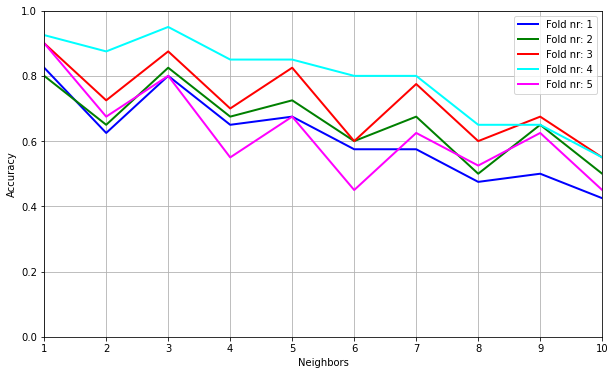

In [278]:
import matplotlib.pyplot as plt

kf = KFold(n_splits=total_folds, shuffle=True, random_state=seed)   # KFold split init 
splits = kf.split(X=features, y=target)                             # Get splits

colors = ["blue", "green", "red", "cyan", "magenta"]    # Define pyplot line colors

plt.figure(figsize=(10, 6)) # Set figsize

fold_nr = 0 # Counter
for train_index, test_index in splits:
    fold_nr += 1

    X_train, X_test = features[train_index], features[test_index]   # X
    y_train, y_test = target[train_index], target[test_index]       # y

    scores = [None] # None so [0] becomes [1]
    for i in range(1, 11):
        classifier = KNN(n_neighbors=i)     # Classifier init
        classifier.fit(X_train, y_train)    # Fit on training data
        y_pred = classifier.predict(X_test) # Predict on testing data
        
        acc = accuracy_score(y_test, y_pred)    # Get acc
        scores.append(acc)                      # Append acc

    plt.plot(scores, color=colors[fold_nr-1], linewidth=2, label="Fold nr: "+str(fold_nr))  # Plot fold data

plt.xlabel("Neighbors") # Set X label
plt.ylabel("Accuracy")  # Set y label
plt.axis([1, 10, 0, 1]) # Set axis range 1,10(x) and 0,1(y)
plt.legend() # Enable legend
plt.grid()   # Enable grid
plt.show()

# n=1 and n=3 are the ones that perform the best